# A* Search Algorithm:
A* search is an informed search algorithm used in Artificial Intelligence for pathfinding on weighted graphs. It leverages both actual costs and a heuristic estimate to efficiently find the shortest path to a goal node.

## How A* Works:
A* prioritizes nodes based on a combination of two factors:
1. g(x): The actual cost of reaching the current node from the start node.
2. h(x): A heuristic estimate of the cost from the current node to the goal node.

The total cost (f(x)) used for prioritization is calculated as f(x) = g(x) + h(x). 
Nodes with lower f(x) values are explored first, guiding the search towards the goal efficiently.

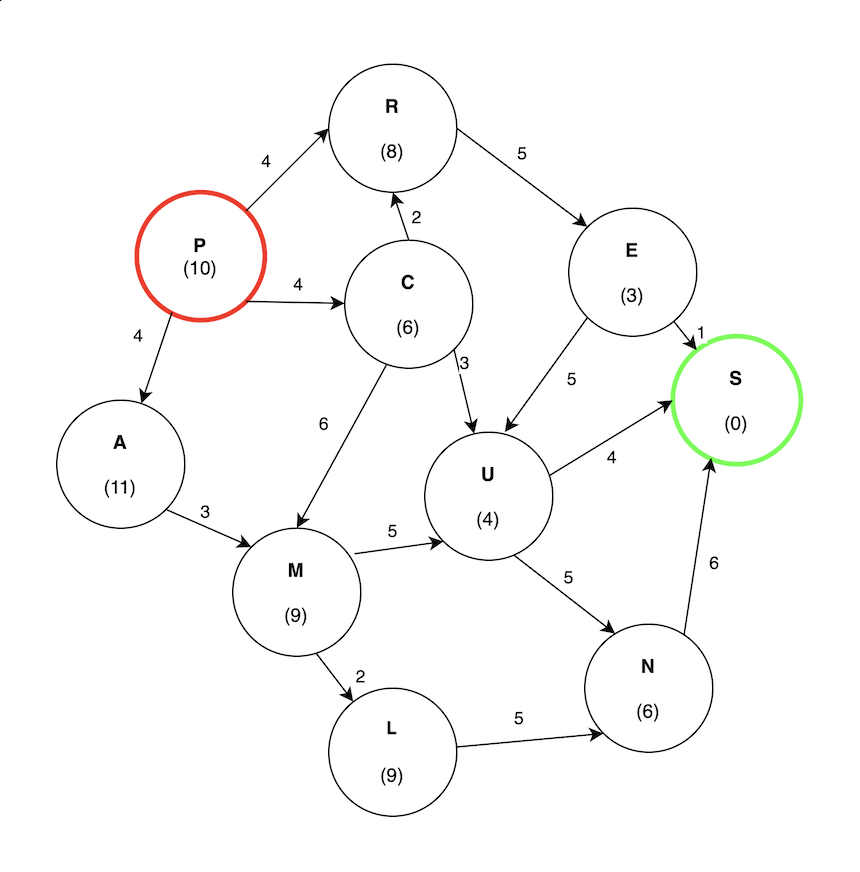

## Key Characteristics:
* **Heuristic-Based:** Unlike uninformed search algorithms like Uniform Cost Search (UCS), A* prioritizes exploration based on a combination of actual cost (g(x)) traveled so far and a heuristic estimate (h(x)) of the remaining cost to the goal. This f(x) = g(x) + h(x) value guides the search towards the most promising paths.
* **Optimal:** A* is guaranteed to find the shortest path (optimal solution) if the heuristic function used is consistent. A consistent heuristic never overestimates the actual cost to reach the goal from any node. In simpler terms, it should always be an underestimate or equal to the true cost.
* **Efficiency:** Compared to uninformed search algorithms like UCS, A* can be significantly more efficient, especially for large graphs. By prioritizing nodes with lower f(x) values, it focuses on paths that seem closer to the goal, potentially pruning out less promising branches earlier. This can lead to faster exploration and path discovery.
* **Completeness:** A* is a complete algorithm, meaning it will always find a solution to a problem if one exists. However, the efficiency of finding the solution depends on the quality of the heuristic. A good heuristic that is close to the true cost will lead to faster exploration.

In [1]:
import heapq

def a_star_search(graph, start, goal, heuristic):
    visited = set()
    priority_queue = [(0, start, [])]  # (priority, vertex, path)
    cost_so_far = {start: 0}  # Dictionary to store actual cost from start to each node

    while priority_queue:
        current_priority, vertex, path = heapq.heappop(priority_queue)
        
        if vertex == goal:
            return path + [vertex], cost_so_far[vertex]  # Return the path and the total cost (g(x))

        if vertex not in visited:
            visited.add(vertex)
            path = path + [vertex]

            for next_node, weight in graph.get(vertex, {}).items():
                new_cost = cost_so_far[vertex] + weight  # Add actual cost to move
                if next_node not in cost_so_far or new_cost < cost_so_far[next_node]:
                    cost_so_far[next_node] = new_cost
                    priority = new_cost + heuristic[next_node]
                    heapq.heappush(priority_queue, (priority, next_node, path))

    return [], float("inf")  # Return an empty path and infinity cost if no path found

# Example usage
graph = {
    'A': {'M': 3},
    'C': {'R': 2, 'M': 6, 'U': 3},
    'E': {'U': 5, 'S': 1},
    'L': {'N': 5},
    'M': {'L': 2, 'U': 5},
    'N': {'S': 6},
    'P': {'A': 4, 'C': 4, 'R': 4},
    'R': {'E': 5},
    'U': {'S': 4, 'N': 5},
    'S': {},  # Goal node has no outgoing edges
}
heuristic = {
    'A': 11, 'C': 6, 'E': 3, 'L': 9,
    'M': 9, 'N': 6, 'P': 10, 'R': 8,
    'U': 4, 'S': 0,
}
start = 'P'
goal = 'S'
path, cost = a_star_search(graph, start, goal, heuristic)
print(f"Path: {path}, Cost (Total Cost): {cost}")


Path: ['P', 'C', 'U', 'S'], Cost (Total Cost): 11
